<a href="https://colab.research.google.com/github/Faheemfemu/machine-learning-/blob/main/Assignment_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

In [ ]:
# Import statements
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Mount your drive and read the csv file. Make sure you are using the correct file path
from google.colab import drive
drive.mount('/content/drive')
file_path='https://drive.google.com/file/d/1eQQbHl4u6hieivcBd1EwOK7WVkDwZCYZ/view?usp=sharing'
housing=pd.read_csv('https://drive.google.com/uc?id='+file_path.split('/')[-2],header=None, delimiter=r"\s+")


Mounted at /content/drive


In [ ]:
boston=pd.DataFrame(housing )
boston.columns=['CRIM','ZN','INDUS', 'CHAS','NOX','RM ','AGE','DIS ','RAD','TAX','PTRATIO','B','LSTAT','MEDV' ]

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


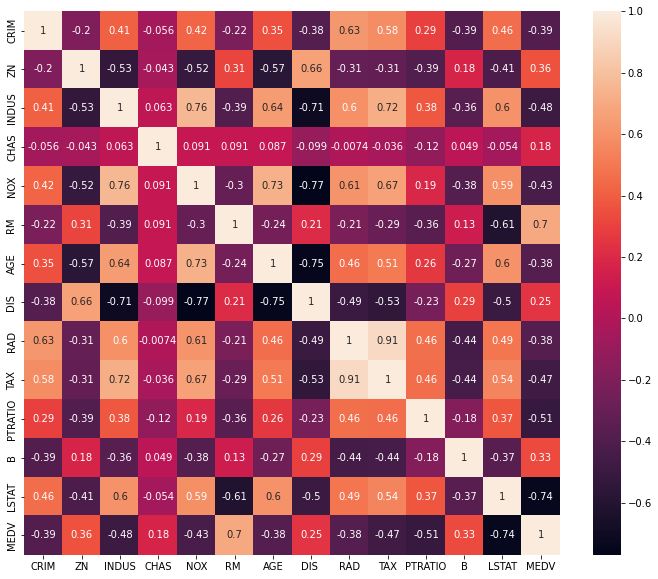

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(boston.corr(),annot=True)


In [ ]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.7 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(housing)
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



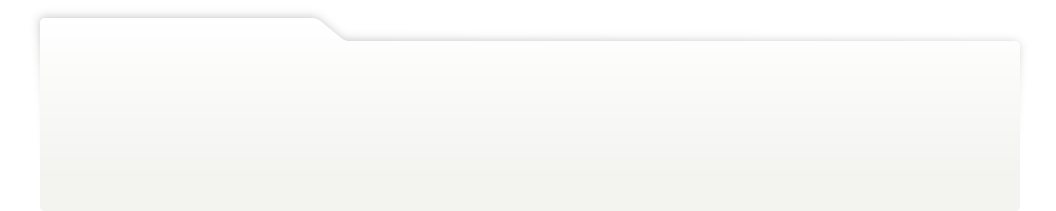
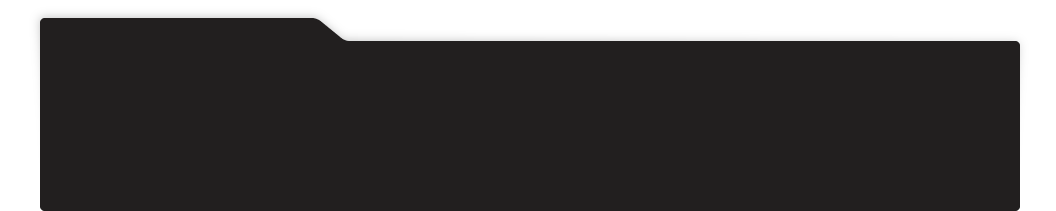
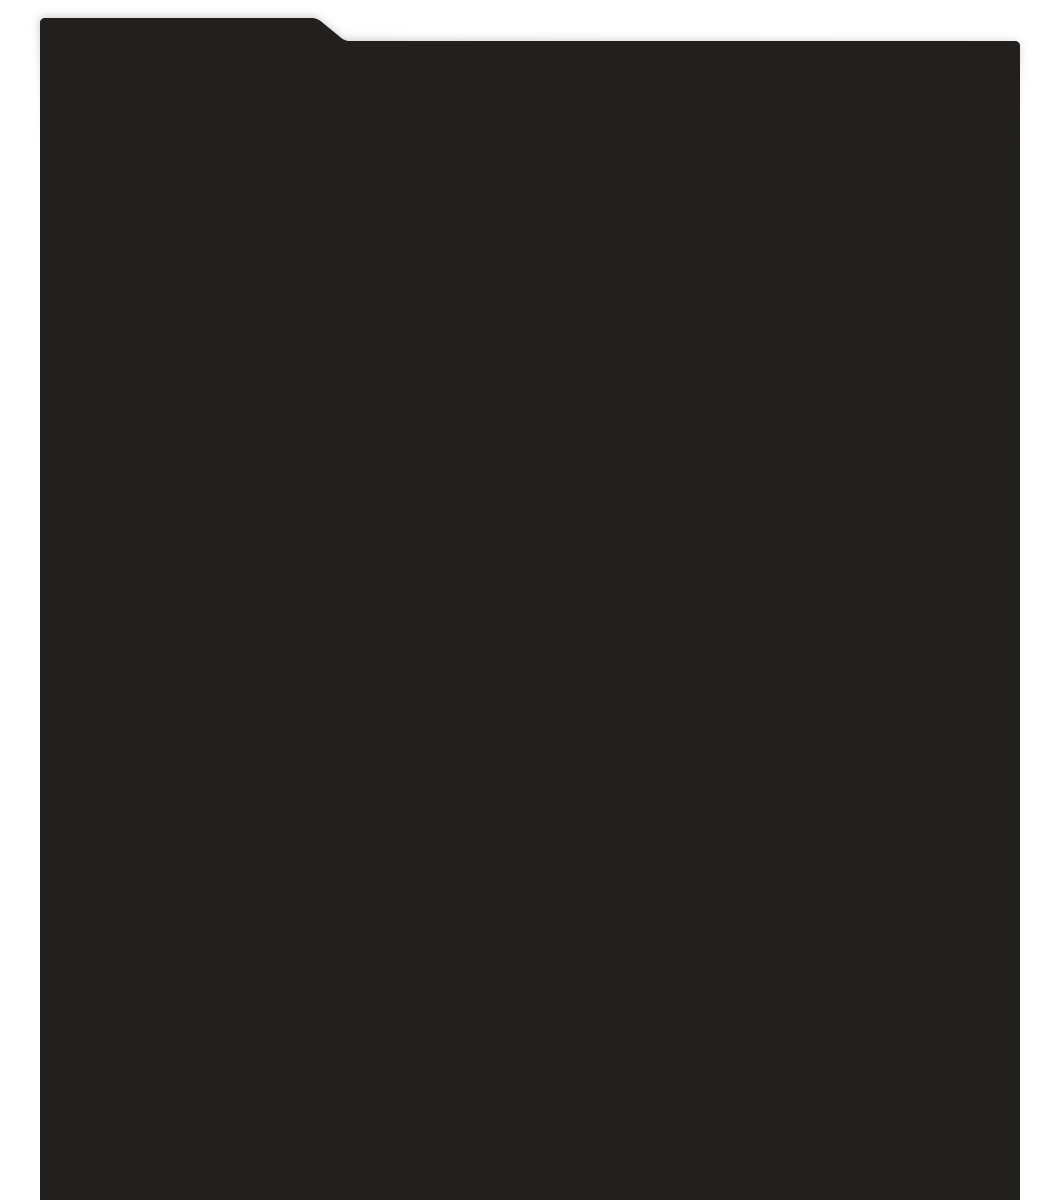
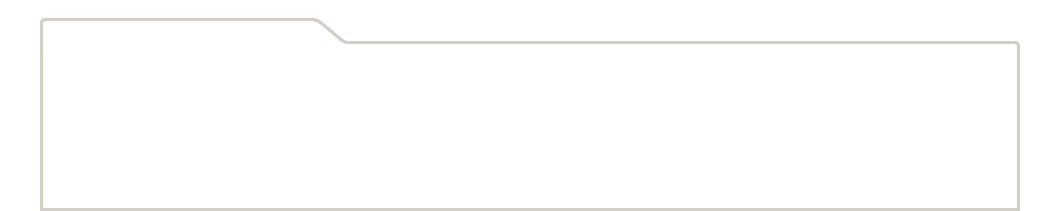
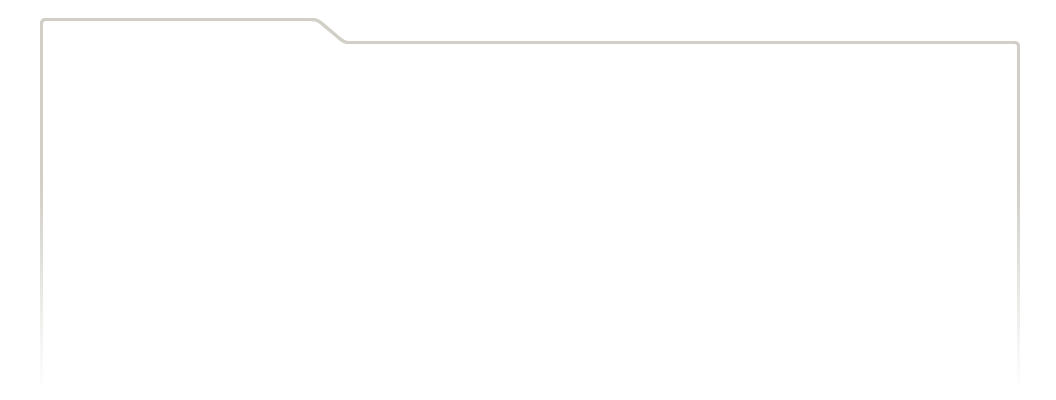
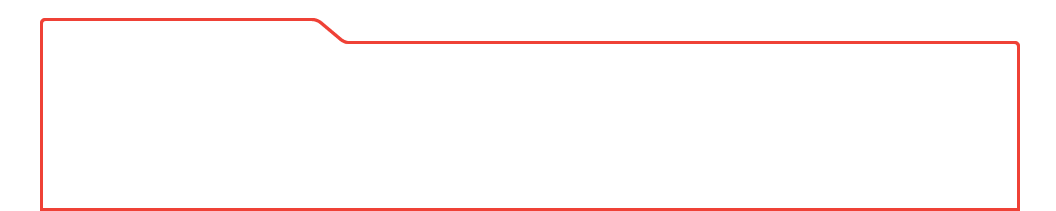
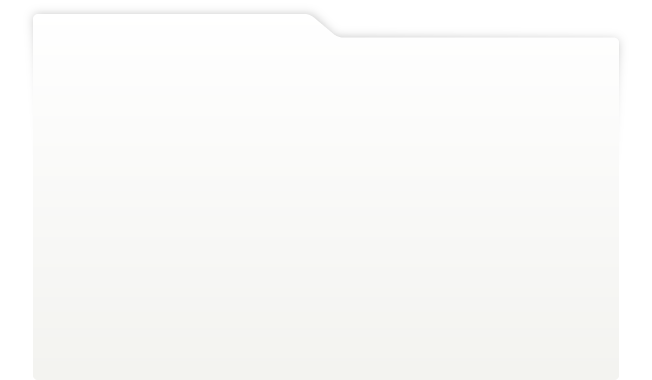
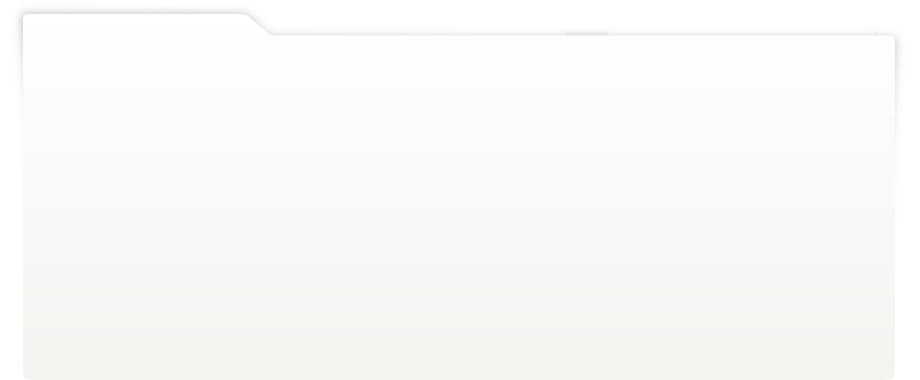
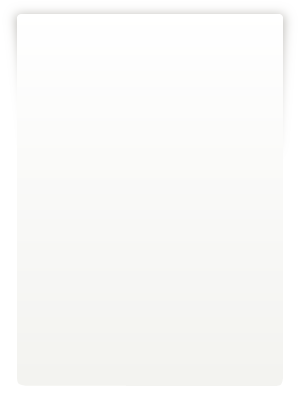
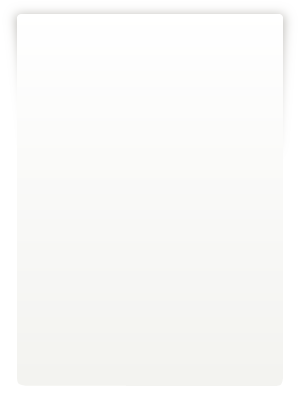
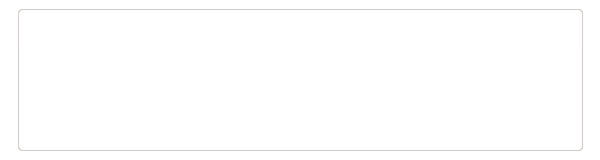
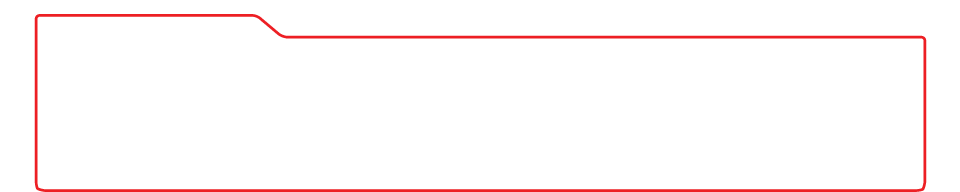
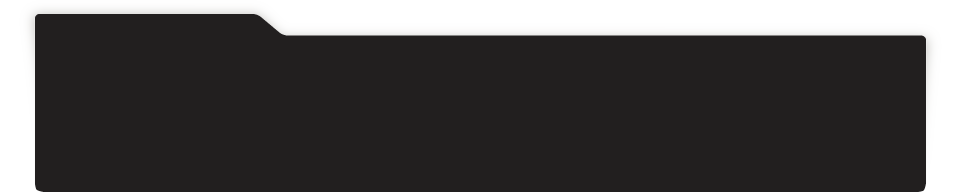
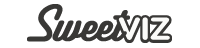
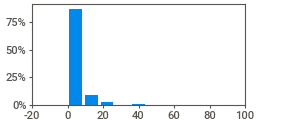
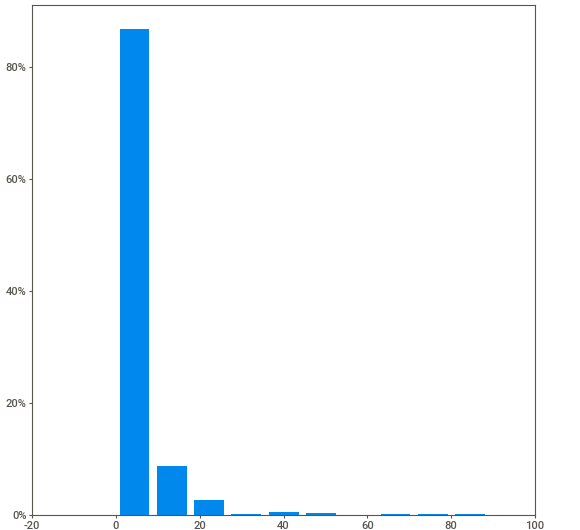
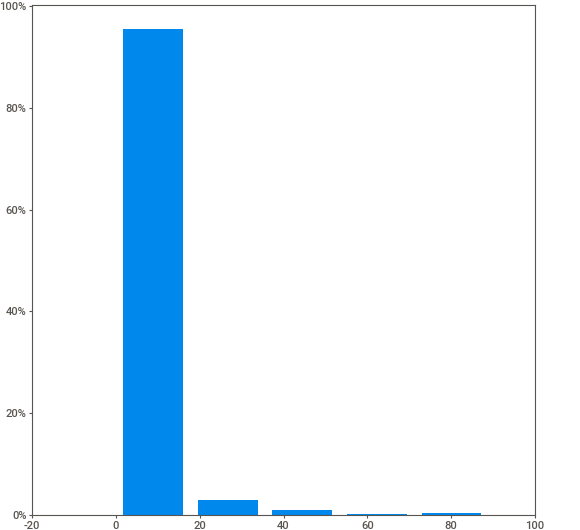
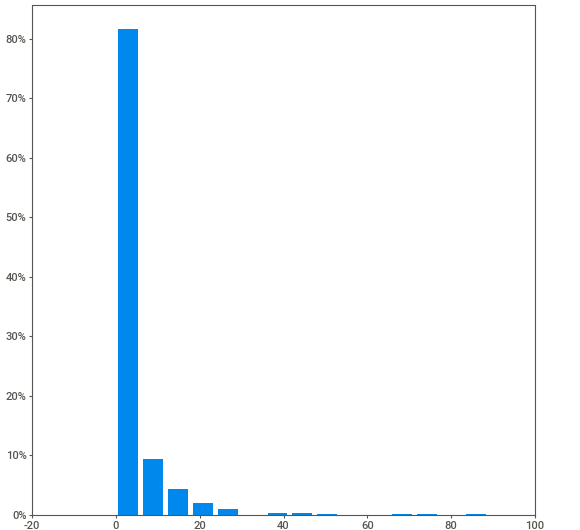
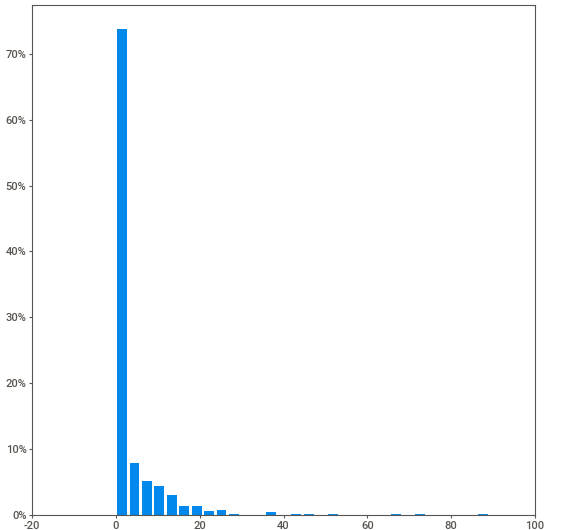
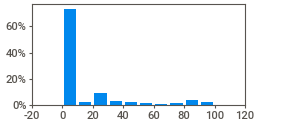
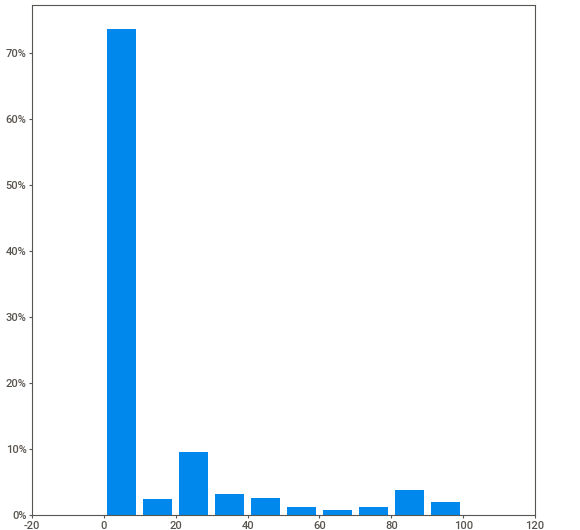
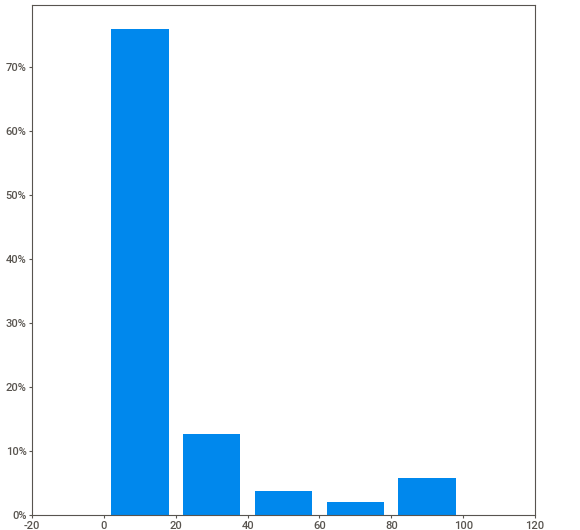
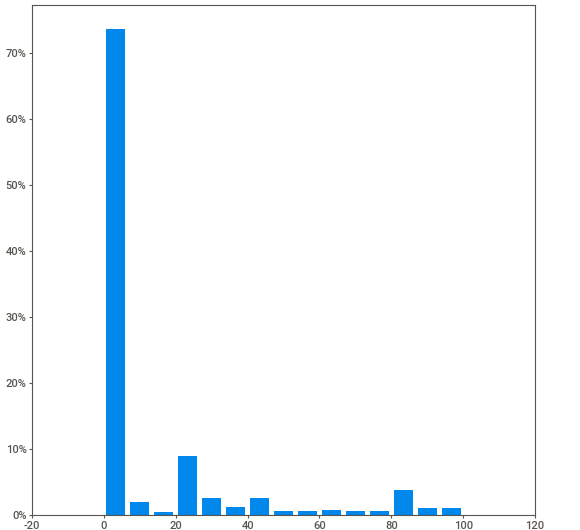
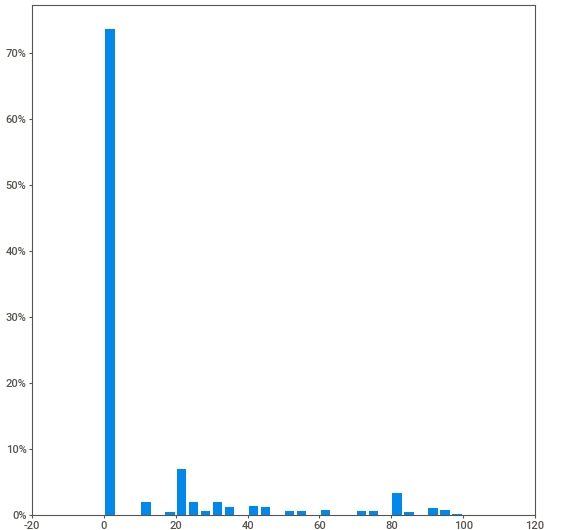
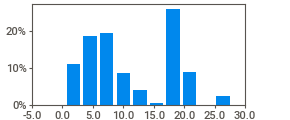
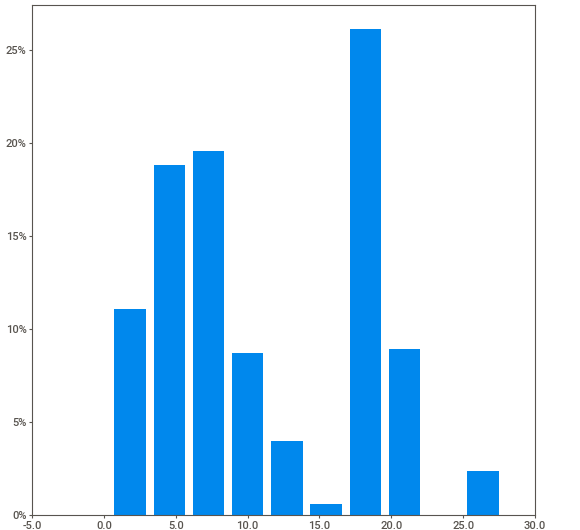
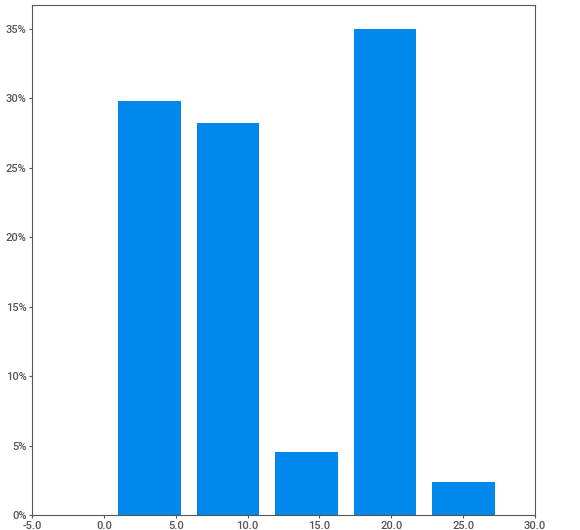
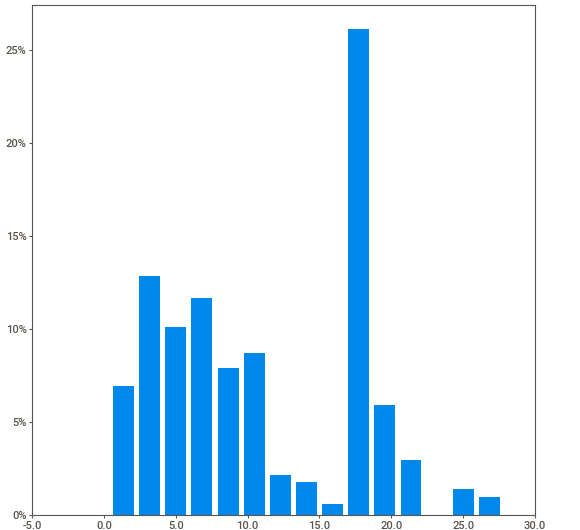
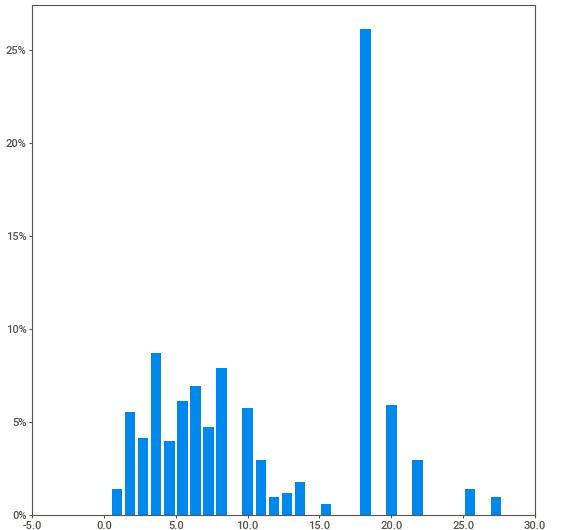
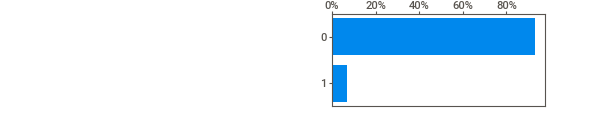
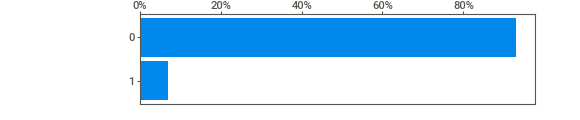
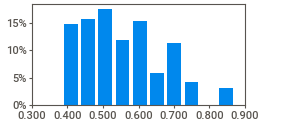
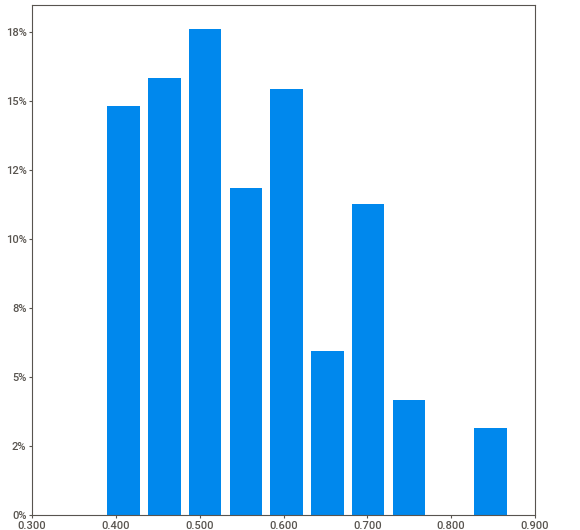
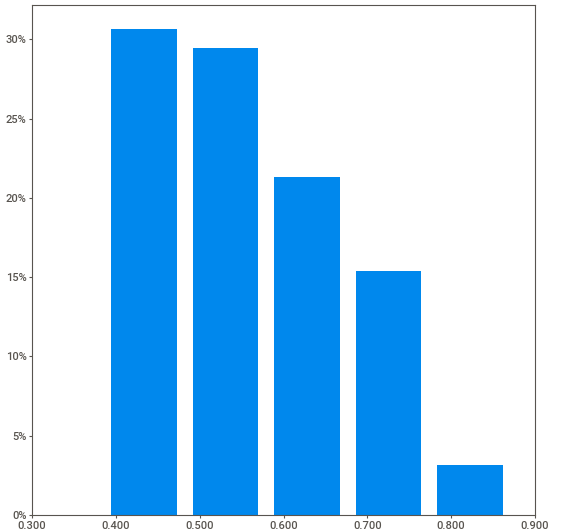
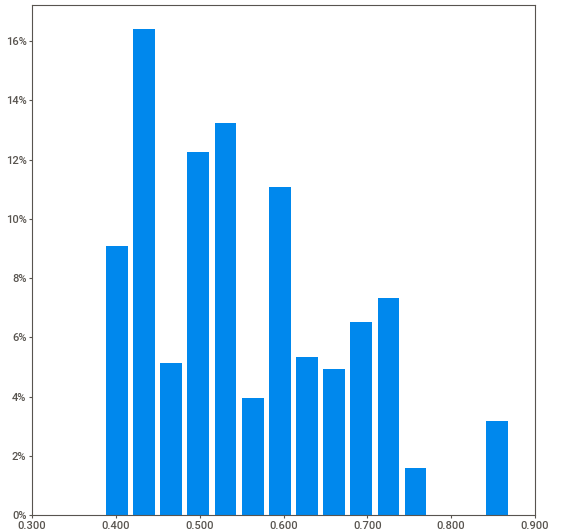
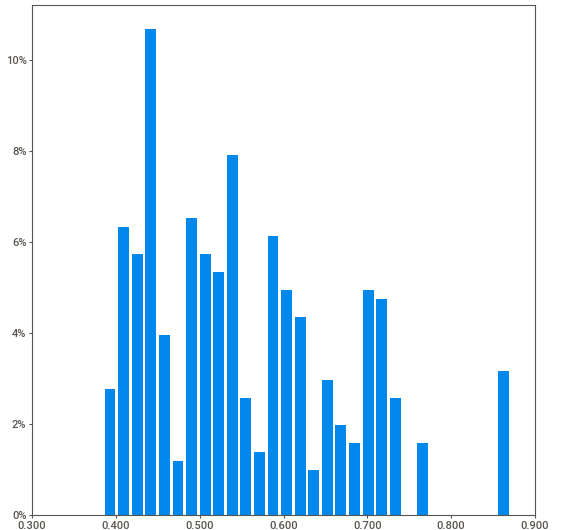
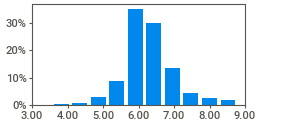
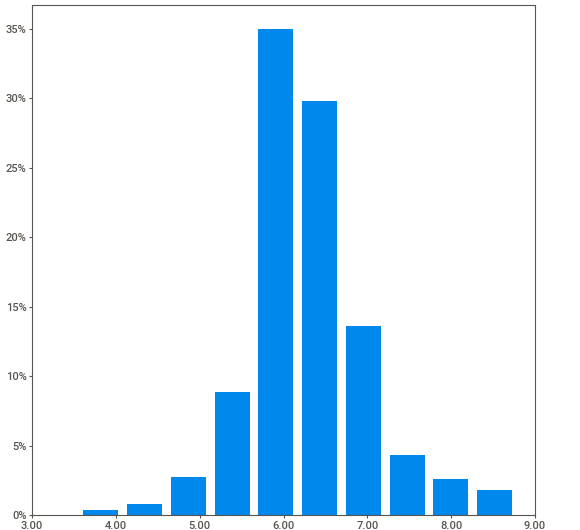
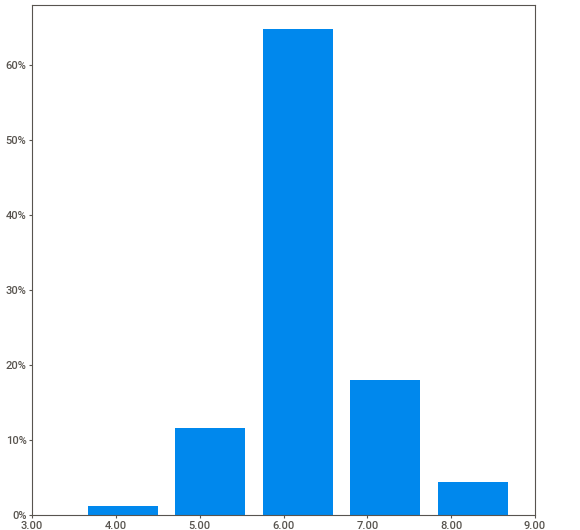
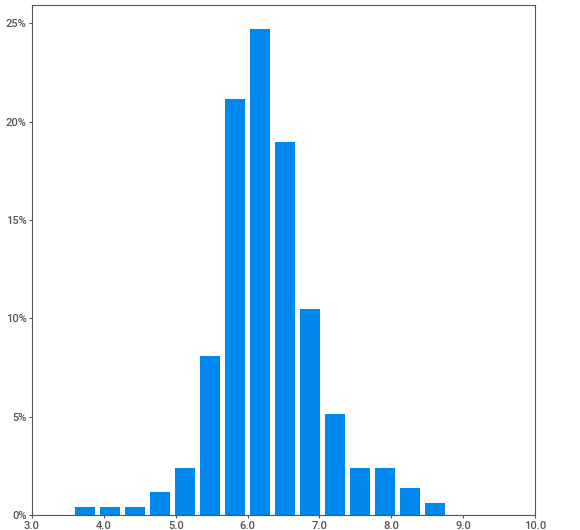
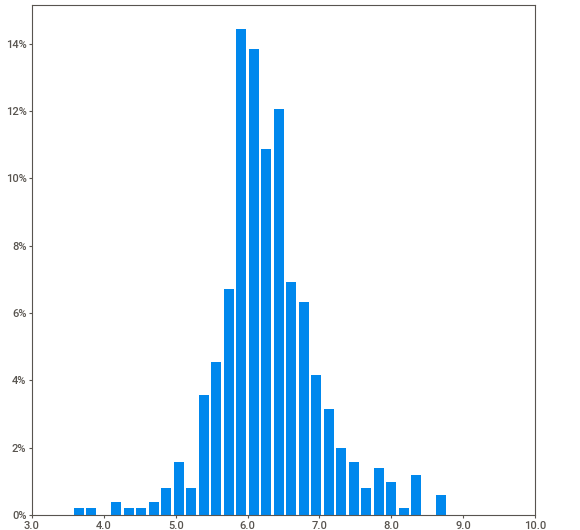
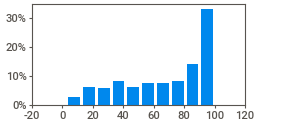
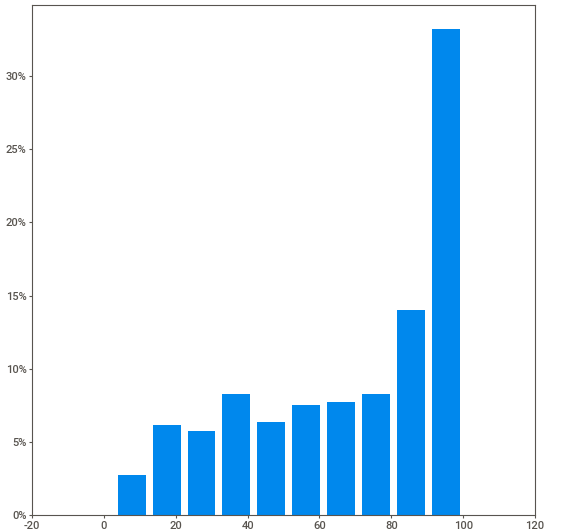
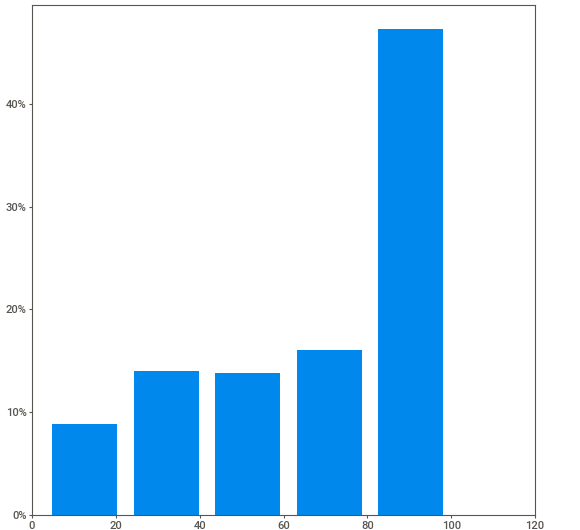
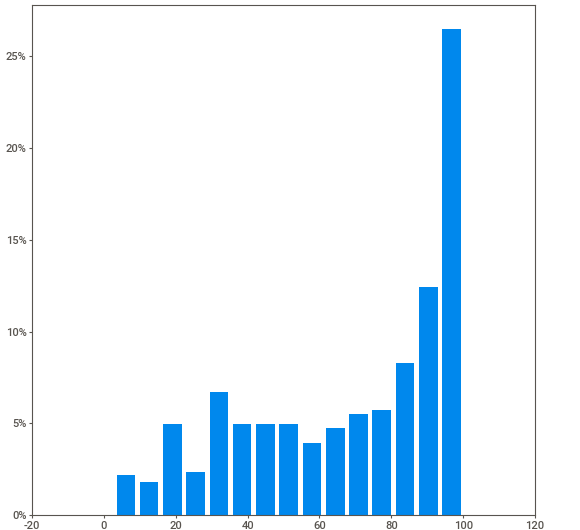
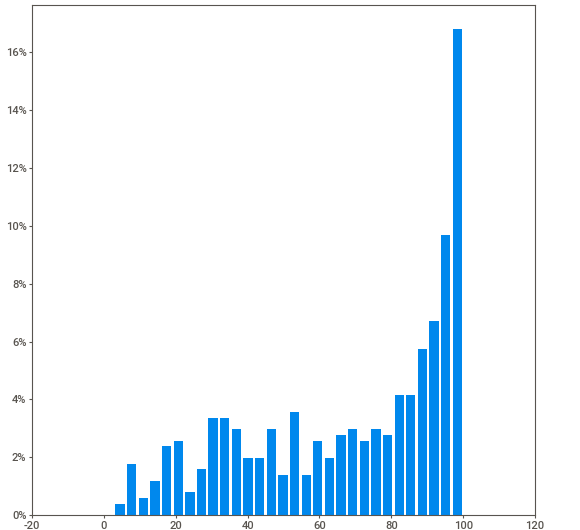
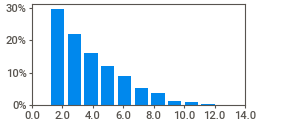
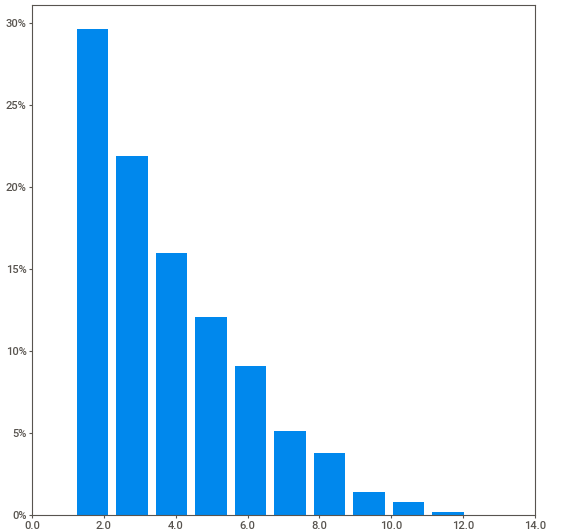
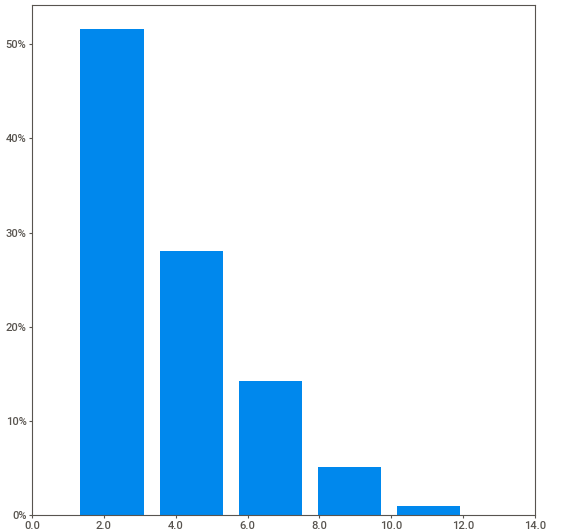
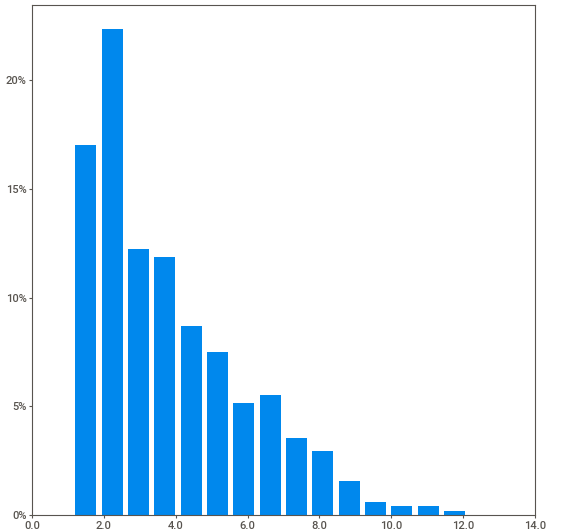
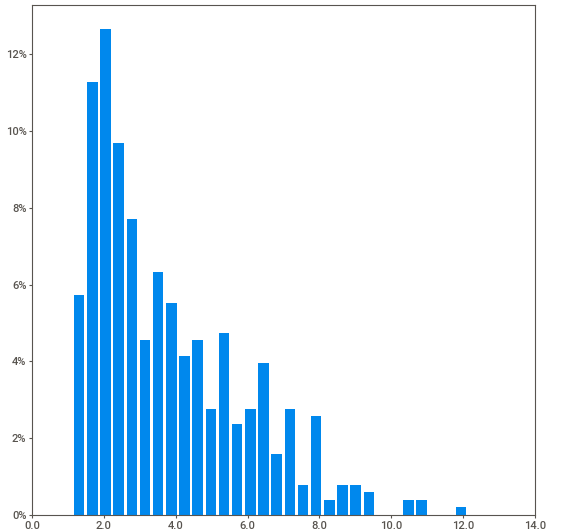
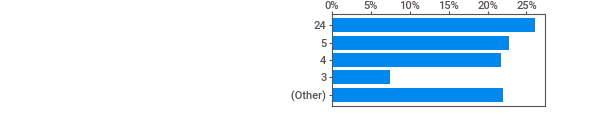
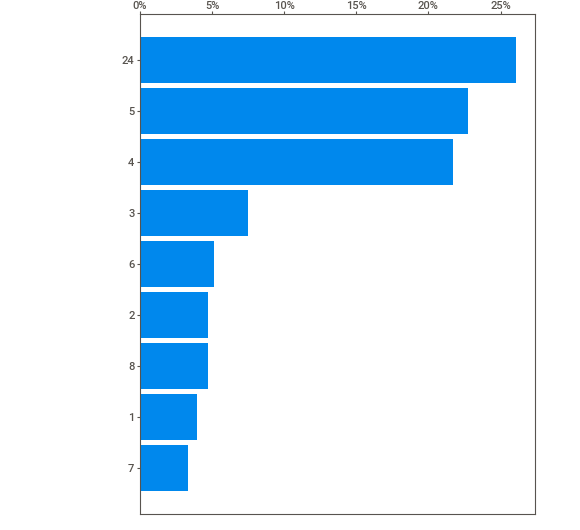
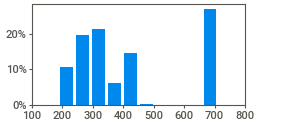
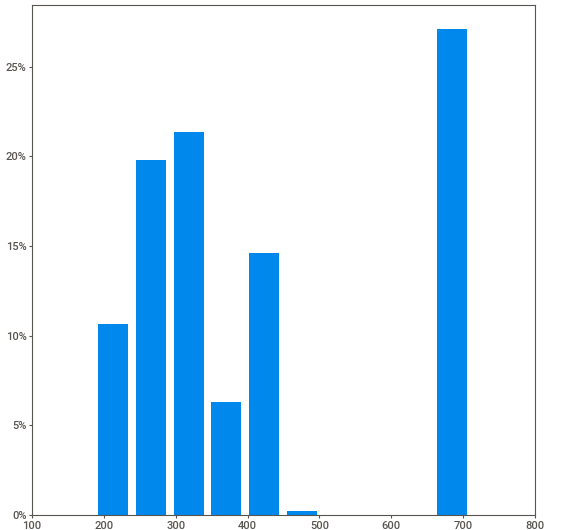
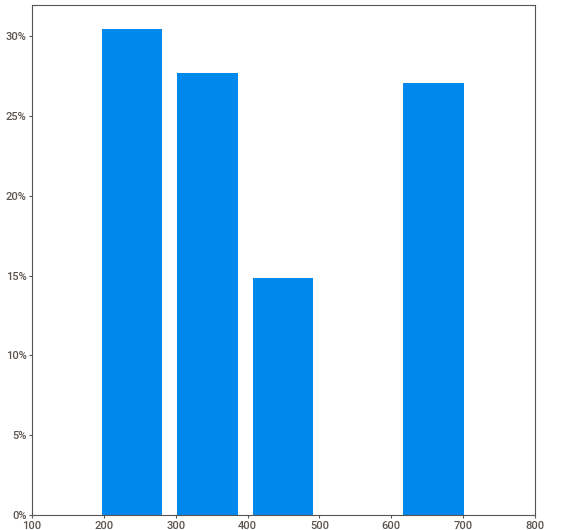
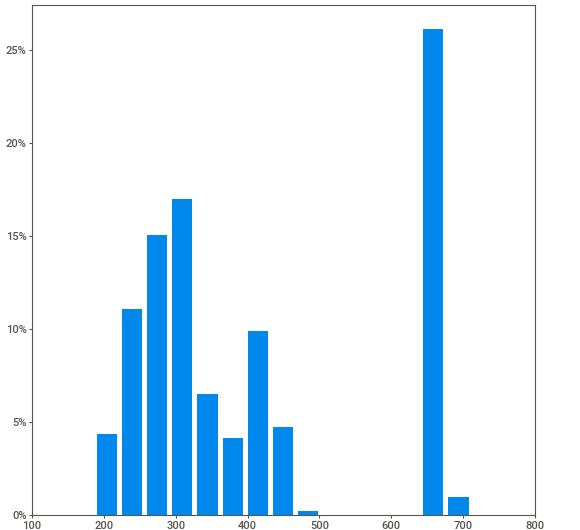
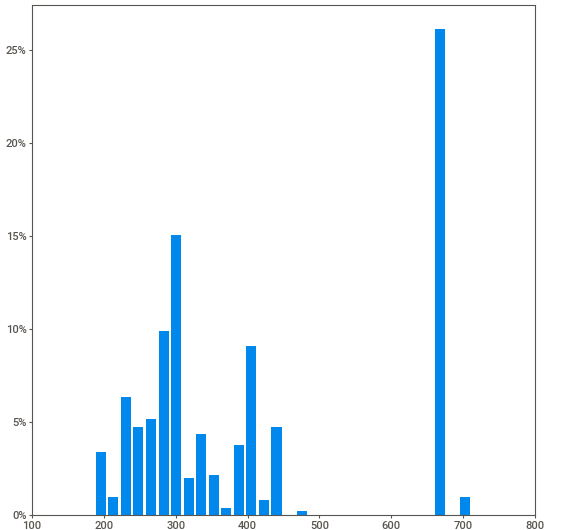
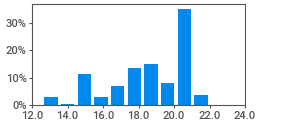
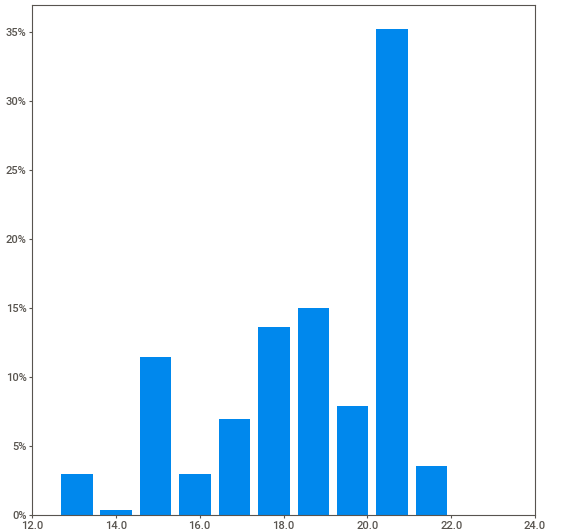
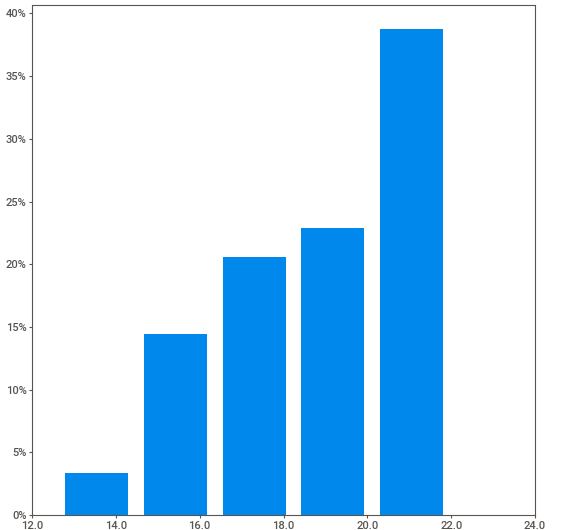
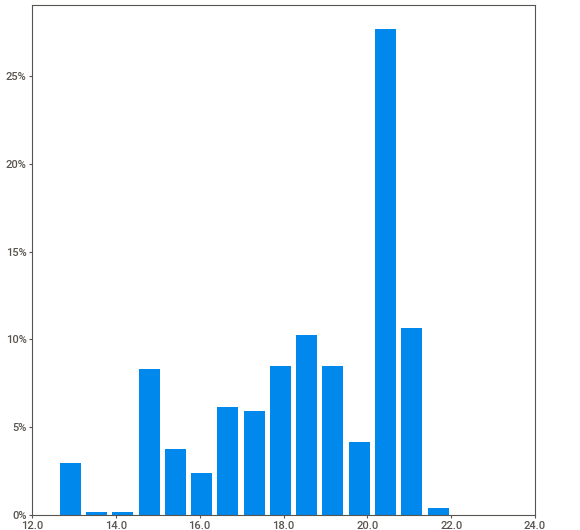
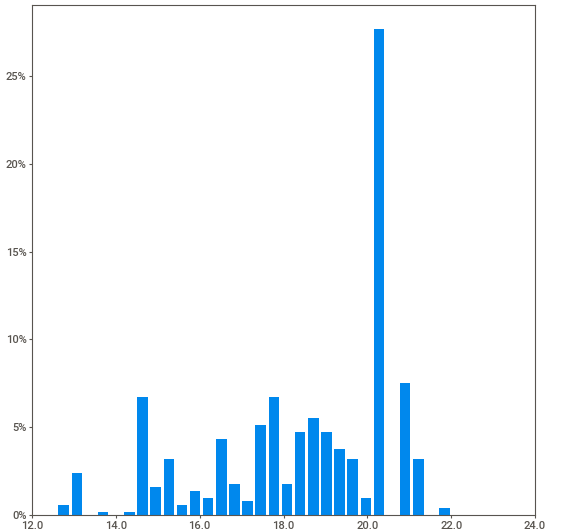
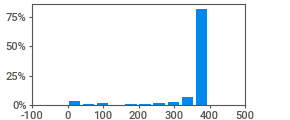
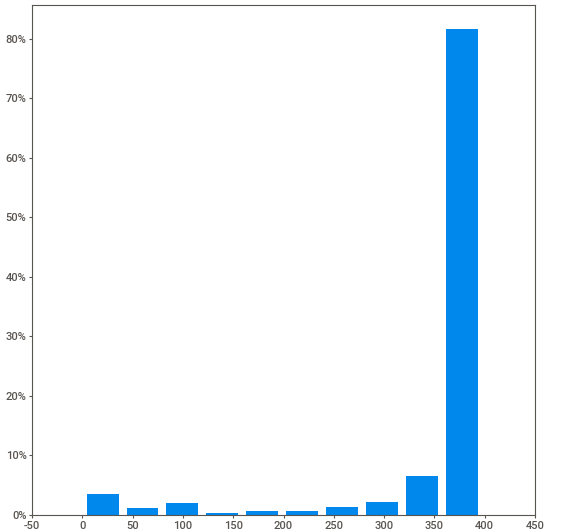
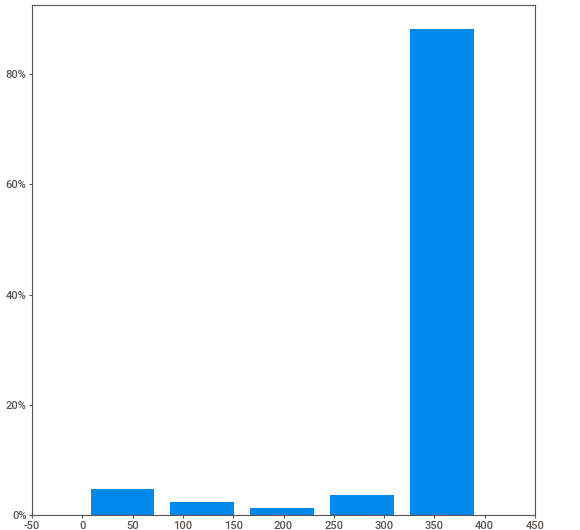
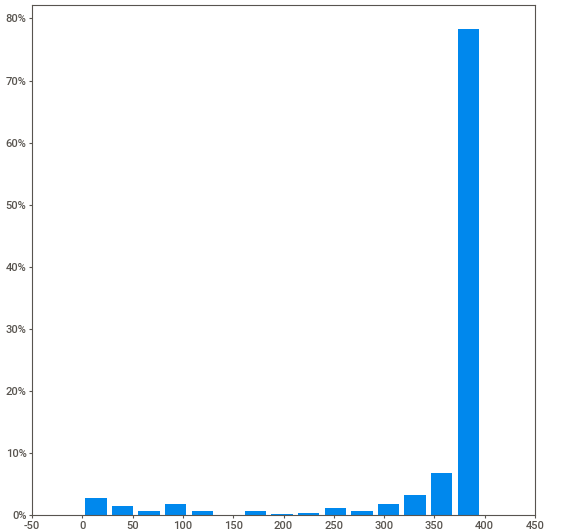
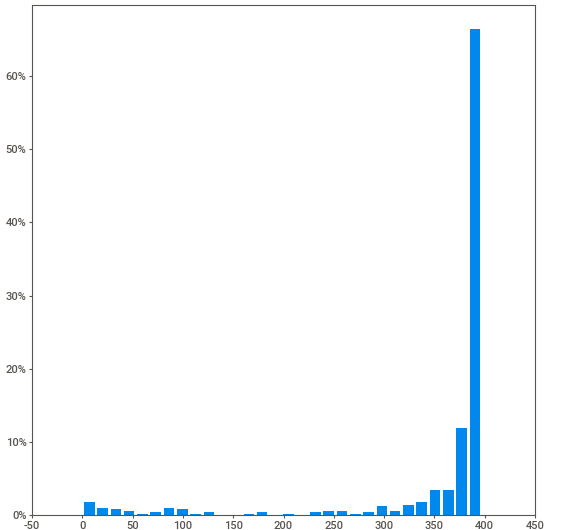
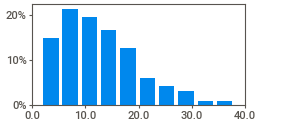
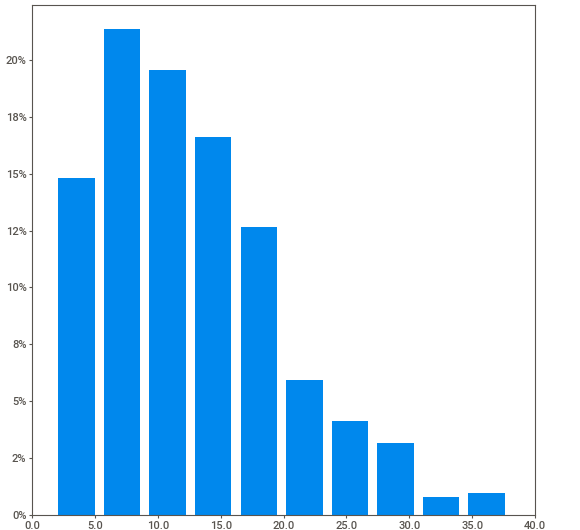
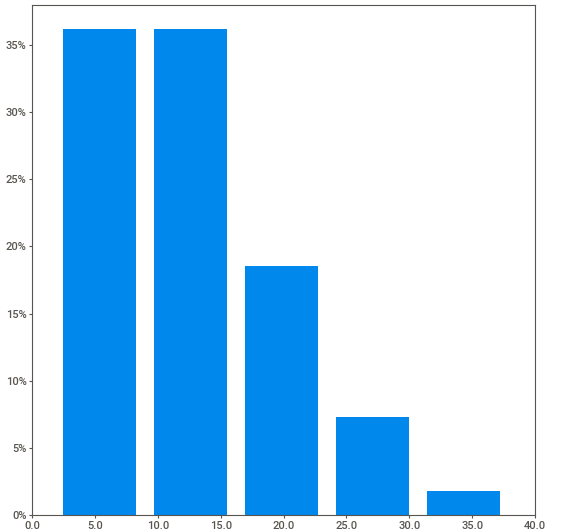
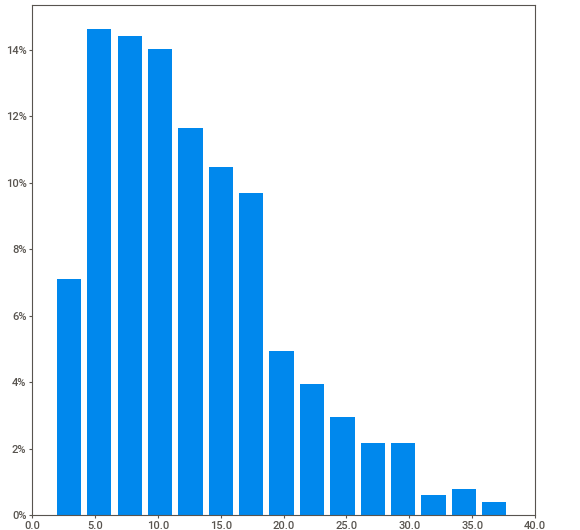
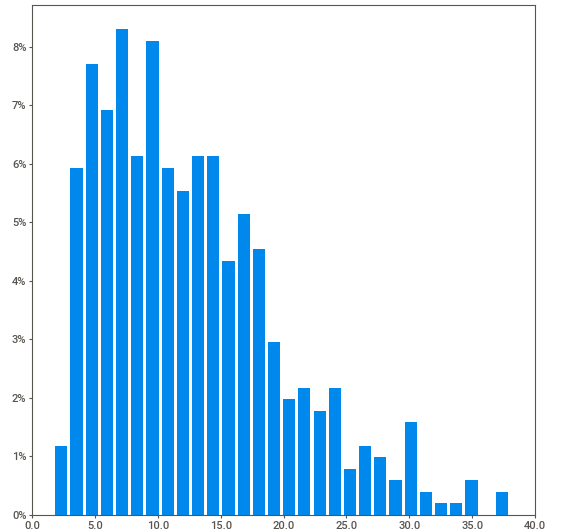
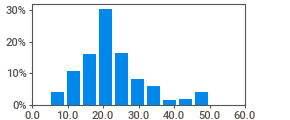
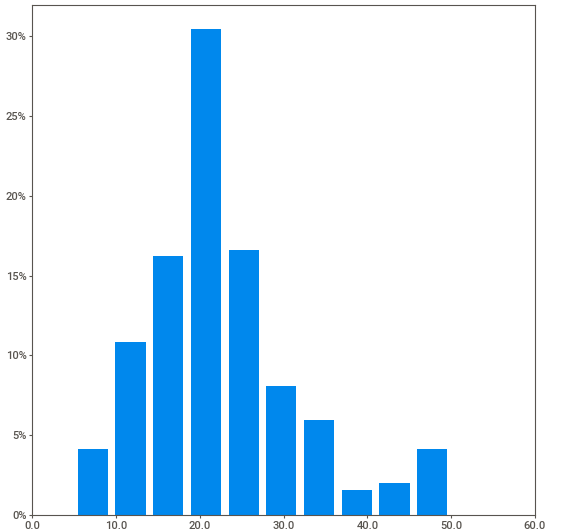
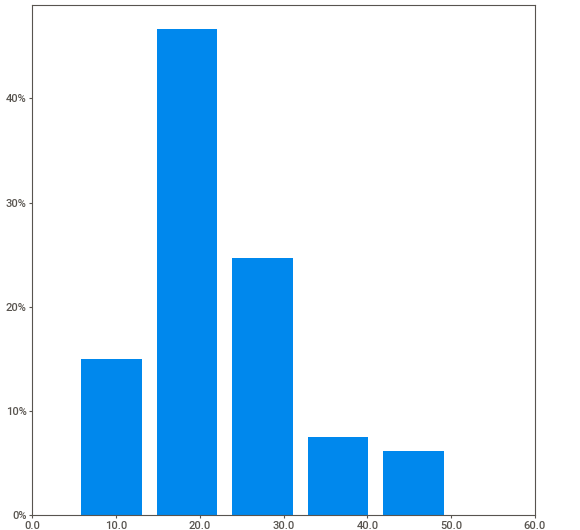
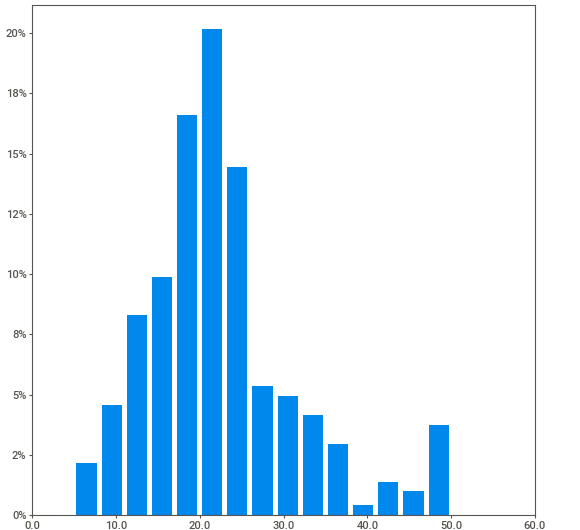
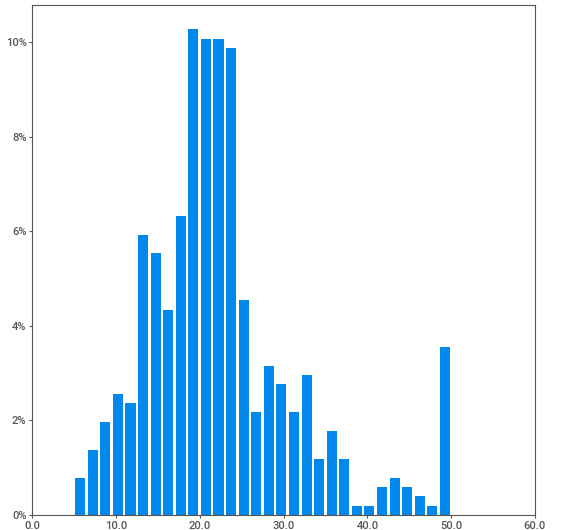
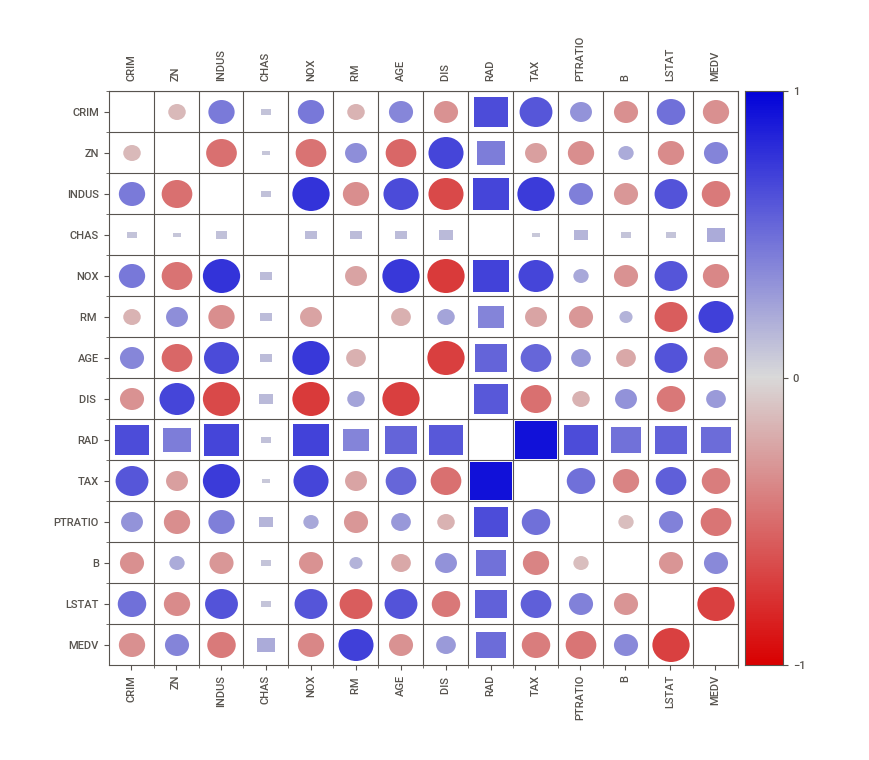
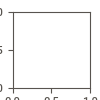

In [ ]:
sweet_report.show_notebook()

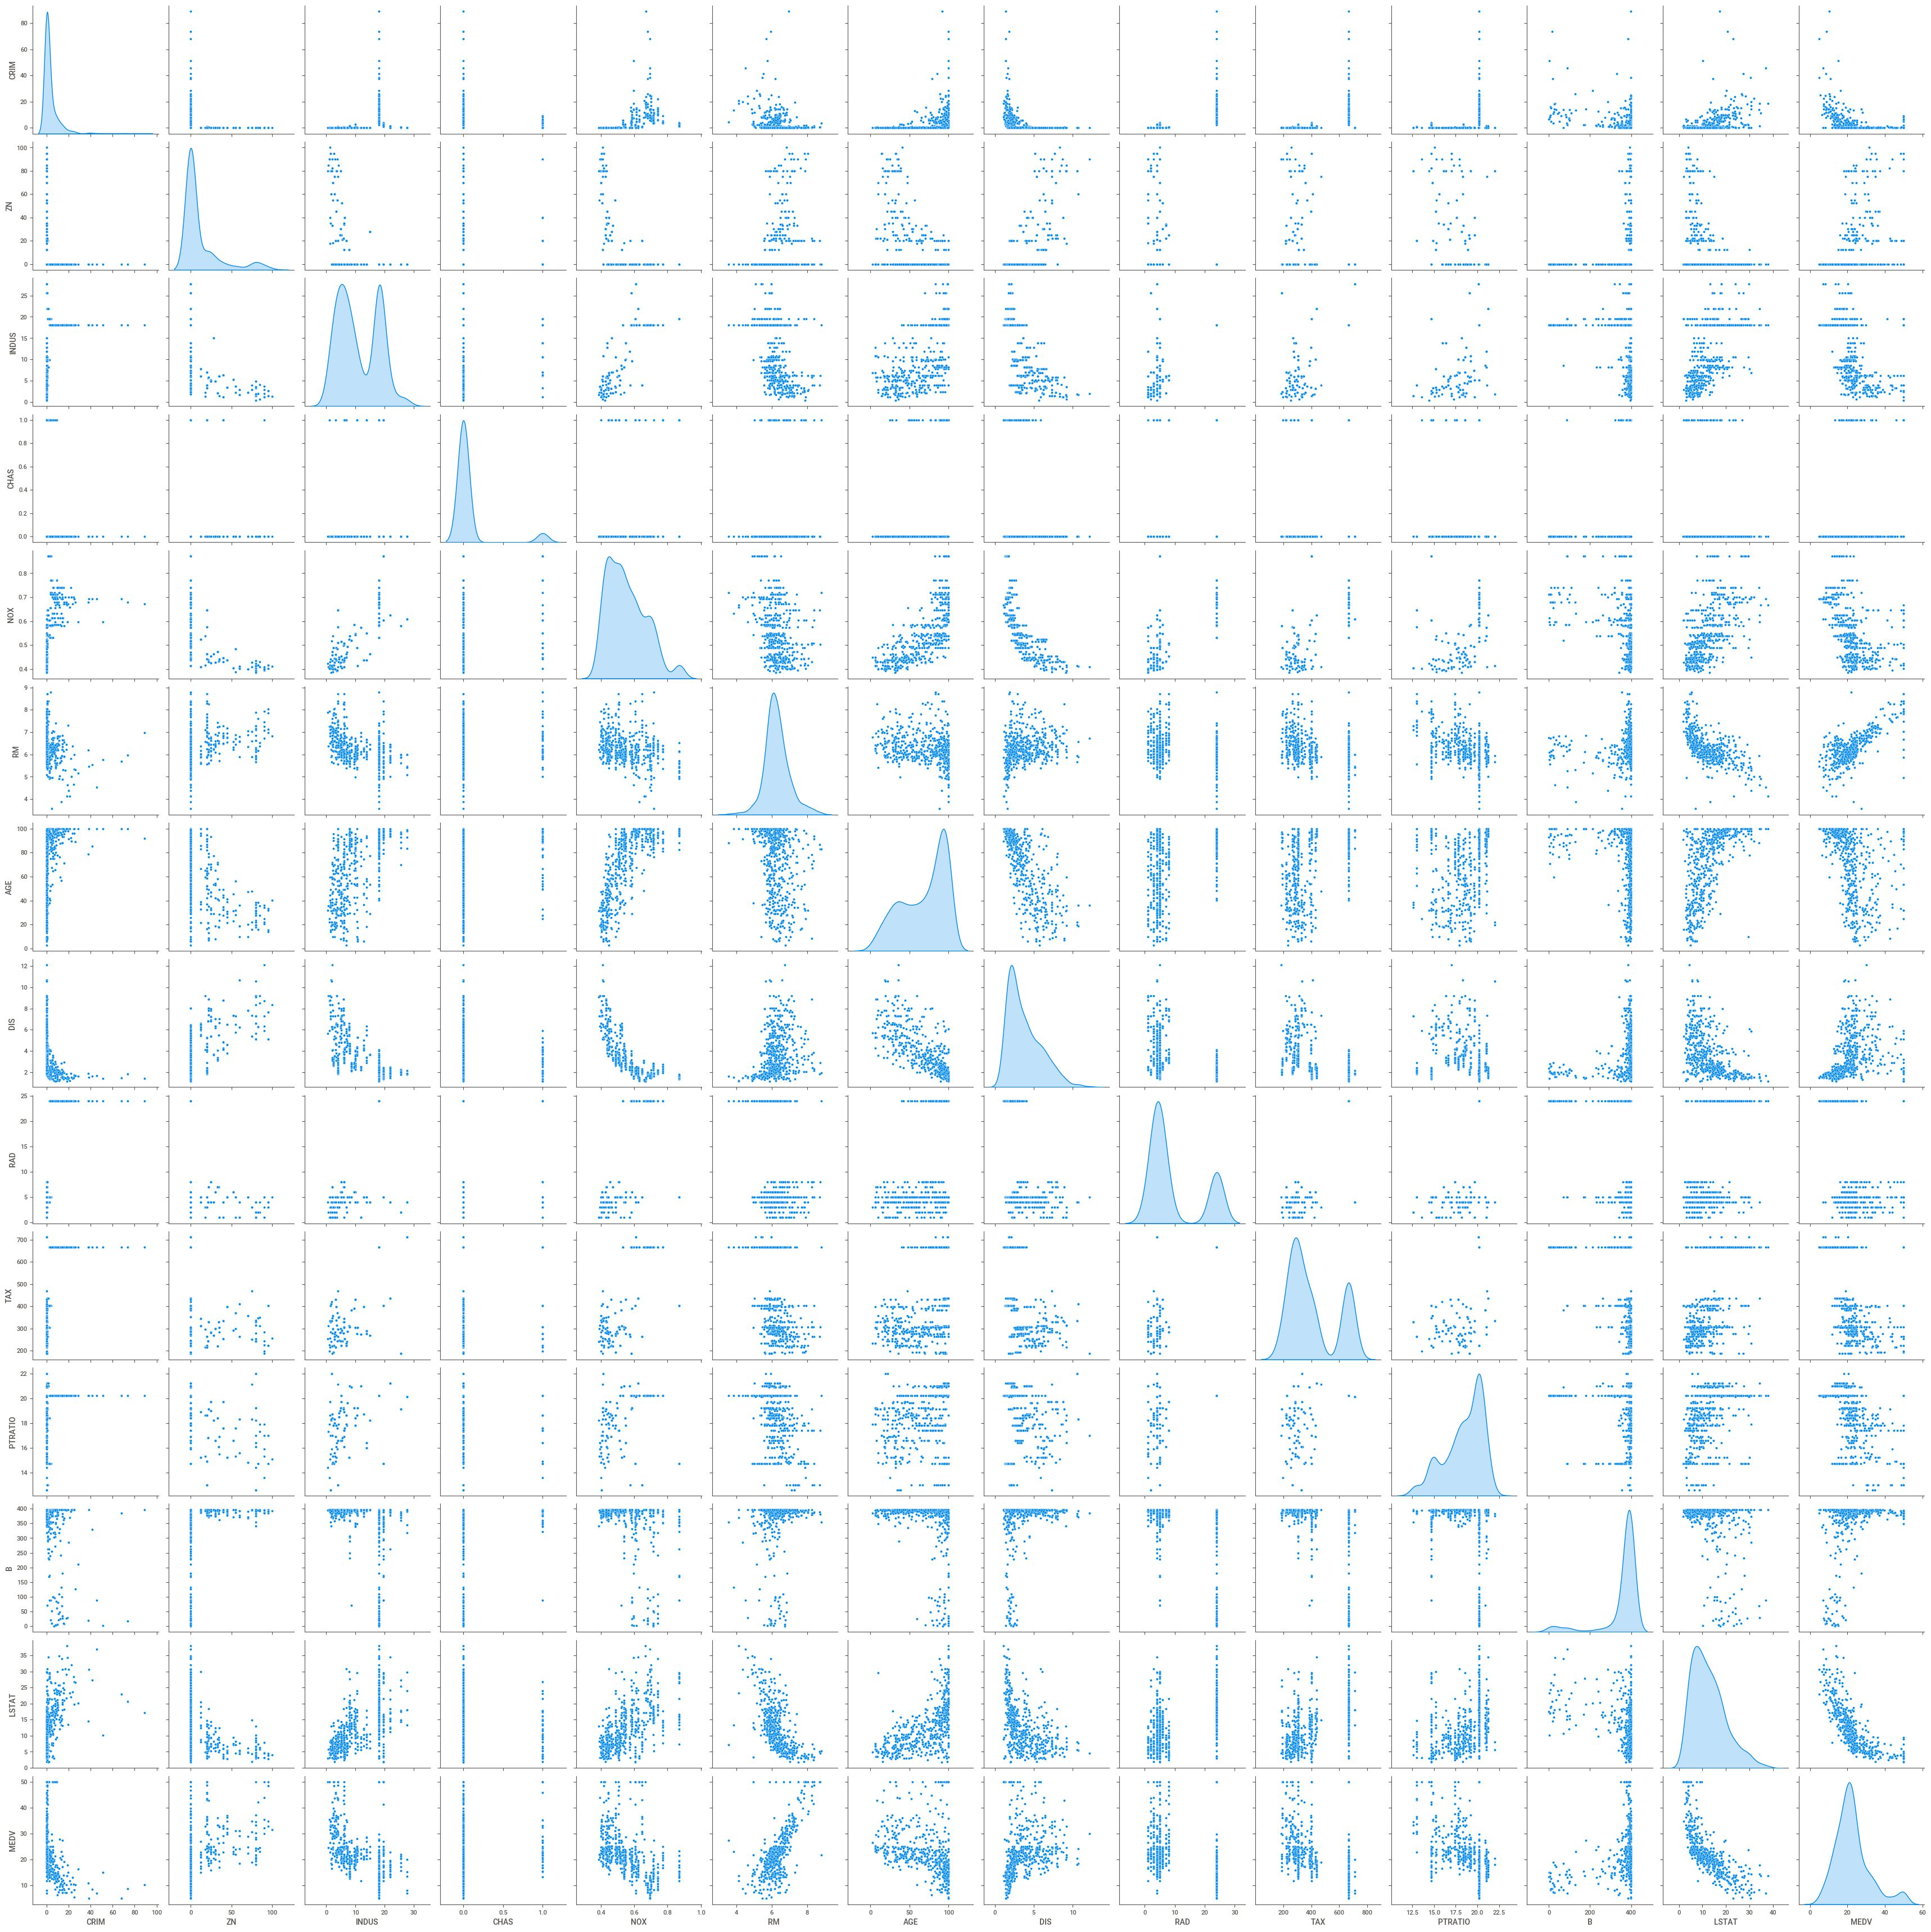

In [ ]:
demo=boston
sns.pairplot(demo,diag_kind='kde')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#demo = pd.read_csv("concrete.csv")
X=demo.drop('MEDV',axis=1)
y=demo['MEDV']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .20,random_state=10)
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print(lr.coef_)
print(lr.intercept_)

Training R2
0.750121534530608
Testing R2
0.6709339839115651
[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
36.533051382824596


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)
lr=LinearRegression()
lr.fit(Xtrain,ytrain)
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))
predicted = lr.predict(Xtest)
print(lr.coef_)
print(lr.intercept_)

Training R2
0.750121534530608
Testing R2
0.6709339839115636
[-1.16449629  1.49915257 -0.05268964  0.49309605 -1.91400079  2.08637507
  0.45488752 -3.15772431  2.71071007 -2.07814318 -1.7549281   1.08897073
 -4.10237313]
21.84183168316832


In [ ]:
#With Pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline((
("sc",StandardScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.750121534530608
Testing R2
0.6709339839115637


In [ ]:
#With Pipeline
from sklearn.preprocessing import PowerTransformer
pipe = Pipeline((
("pt",PowerTransformer()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
0.7532947417982377
Testing R2
0.7269637535133251


In [ ]:
#With Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = Pipeline((
("poly",PolynomialFeatures(degree=3)),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))

Training R2
1.0
Testing R2
-222.98634847549735
